<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

**Carga y caracterización del dataset**

In [207]:
# Carga de los datos a un dataframe y comprobar dimensionalidad
df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data.csv",delimiter=";")
df.shape

(133, 112)

In [184]:
df.info

<bound method DataFrame.info of       ID      IDIOMA         AREA     EQUIPO                EDAD     GENERO  \
0      9  CASTELLANO   Tecnología  Astillero      Más de 20 años  Masculino   
1     12  CASTELLANO   Tecnología  Astillero      Más de 20 años  Masculino   
2     17  CASTELLANO   Tecnología  Astillero  Entre 11 y 20 años   Femenino   
3     30  CASTELLANO   Tecnología  Astillero      Más de 20 años  Masculino   
4     32  CASTELLANO   Tecnología  Astillero      Más de 20 años  Masculino   
..   ...         ...          ...        ...                 ...        ...   
136   67  CASTELLANO          NaN        NaN                 NaN        NaN   
137   79  CASTELLANO  Consultoría        NaN                 NaN        NaN   
138   95  CASTELLANO          NaN        NaN                 NaN        NaN   
139  113  CASTELLANO        Legal        NaN                 NaN        NaN   
140  127  CASTELLANO  Consultoría        NaN                 NaN        NaN   

      V1   V2   V3 

In [185]:
df.head(10)

,ID,IDIOMA,AREA,EQUIPO,EDAD,GENERO,V1,V2,V3,SA1,...,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3,Obs1
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,4.0,4.0,NaN
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,3.0,3.0,3.0,3.0,6.0,4.0,3.0,2.0,5.0,NaN
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,5.0,1.0,5.0,6.0,6.0,6.0,5.0,3.0,2.0,NaN
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,NaN
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,6.0,6.0,2.0,1.0,1.0,NaN
5,34,CASTELLANO,Tecnología,Astillero,Más de 20 años,Femenino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,4.0,4.0,3.0,3.0,4.0,NaN
6,45,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,6.0,6.0,4.0,2.0,4.0,LKS TENDRIA QUE TENER UNA VISION MAS INTERNACI...
7,47,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,2.0,1.0,NaN
8,56,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,4.0,5.0,3.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,5.0,LKS deberí­a utilizar la oficina de Astillero ...
9,60,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,6.0,5.0,4.0,5.0,...,4.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,5.0,"Evolucionar los equipos, áreas y departamentos..."


**Histograma de valores nulos por atributo en el dataframe original**

In [186]:
missing_values = df.isnull().sum()


In [187]:
missing_percentage = (missing_values / len(df)) * 100

threshold = 1
attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()


len(attributes_with_missing)

102

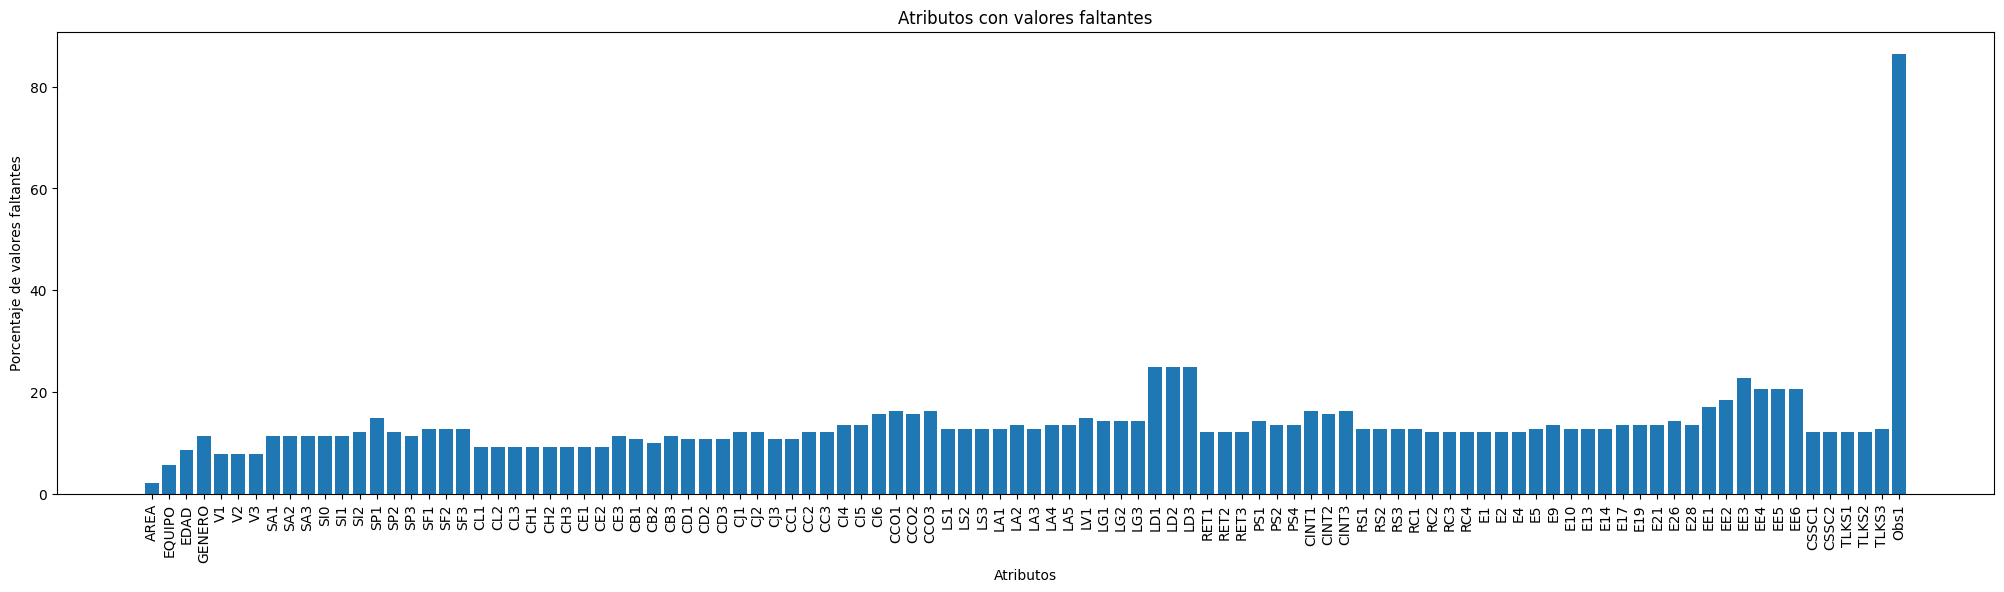

In [188]:
plt.figure(figsize=(25, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()

**Eliminación de filas con todos los valores nulos**

In [189]:
# Elimina los registros con todos los valores nulos, excepto las columnas de dimensiones
#df_sin_nulos = df.dropna(subset=df.columns.difference(dimensiones), how='all',inplace=False)
df_sin_nulos=df.dropna(subset=df.columns[6:],how='all',inplace=False)



In [190]:
df_sin_nulos.shape

(133, 104)

In [191]:
df_sin_nulos.head(5)

,ID,IDIOMA,AREA,EQUIPO,EDAD,GENERO,V1,V2,V3,SA1,...,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3,Obs1
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,4.0,4.0,NaN
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,3.0,3.0,3.0,3.0,6.0,4.0,3.0,2.0,5.0,NaN
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,5.0,1.0,5.0,6.0,6.0,6.0,5.0,3.0,2.0,NaN
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,NaN
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,6.0,6.0,2.0,1.0,1.0,NaN


**Histograma de valores nulos por atributo en del dataframe sin filas nulas**

In [192]:
# Se obtiene el número de valores faltantes por cada atributo
missing_values = df_sin_nulos.isnull().sum()

In [193]:
threshold = 10

missing_percentage = (missing_values[6:] / len(df_sin_nulos)) * 100

attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()
attributes_with_missing

['CI6',
 'CCO1',
 'CCO2',
 'CCO3',
 'LD1',
 'LD2',
 'LD3',
 'CINT1',
 'CINT2',
 'CINT3',
 'EE1',
 'EE2',
 'EE3',
 'EE4',
 'EE5',
 'EE6',
 'Obs1']

In [194]:
# Se seleccionan aquellos atributos que estén por encima de un umbral de valores faltantes, dejando de lado las columnas de dimensiones
threshold = 10

missing_percentage = (missing_values[6:]  / len(df_sin_nulos)) * 100

attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()

len(attributes_with_missing)

17

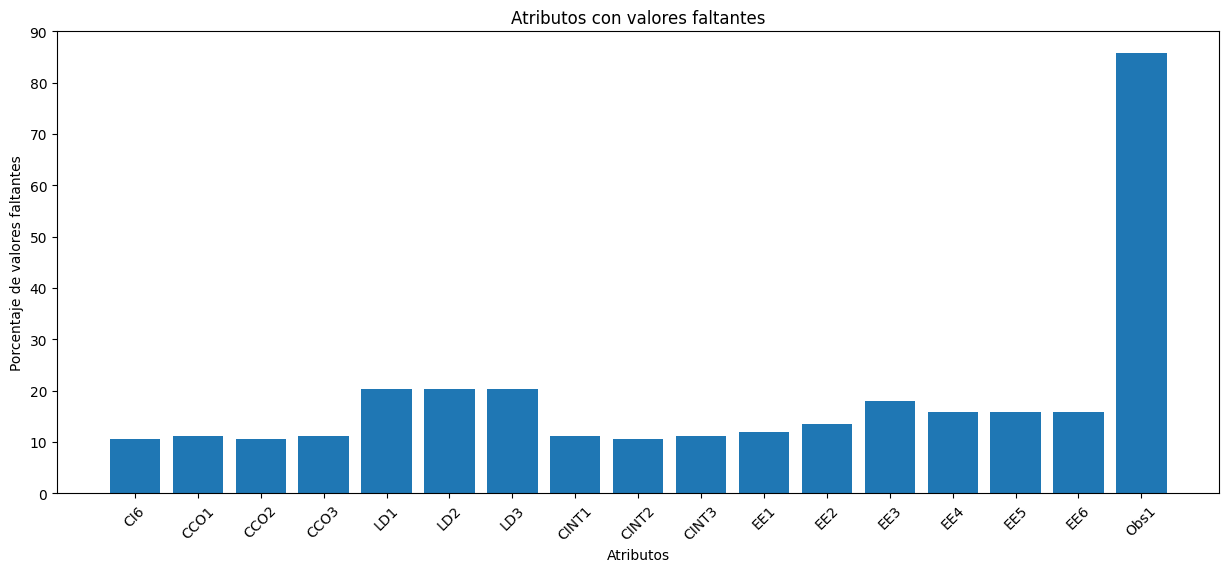

In [195]:
# Se dibujan los atributos que superan el umbral de valores faltantes
plt.figure(figsize=(15, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad


plt.show()



---


Diagrama de dispersión de valores vacíos por dimensiones??

---





**Eliminación de los campos con un nivel de vacíos alto**

In [196]:
df_sin_nulos[attributes_with_missing[0:-1]]

,CI6,CCO1,CCO2,CCO3,LD1,LD2,LD3,CINT1,CINT2,CINT3,EE1,EE2,EE3,EE4,EE5,EE6
0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,2.0,2.0,2.0,6.0,6.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,2.0,3.0,3.0,NaN,NaN,NaN,3.0,3.0,3.0,1.0,5.0,5.0,1.0,5.0,6.0
3,NaN,NaN,NaN,NaN,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,4.0,4.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,5.0,5.0,1.0,1.0,5.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0
137,3.0,3.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,2.0,4.0,5.0,5.0,5.0,4.0,5.0
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [197]:
df_sin_nulos=df_sin_nulos.drop(attributes_with_missing[0:-1],axis=1)

In [198]:
df_sin_nulos.shape

(133, 88)

**Creación de campos con valores medios por cada tema en las preguntas**

Cada tema se caracteriza por los caracteres iniciales de los nombres de las columnas

In [199]:
# Función que realiza los siguientes pasos:
# - Ignora los campos de dimensiones (primeros 6)
# - Selecciona las columnas que pertenecen a un mismo grupo (por las iniciales)
# - Crea una nueva columna con la media por cada tema, evitando los campos con valores no númericos

def agrupar_campos_y_calcular_media(dataframe):
    columnas = dataframe.columns[6:]  # Ignorar los primeros 6 campos

    # Filtrar las columnas que siguen el patrón "letras seguidas de números"
    columnas_a_agrupar = [columna for columna in columnas if re.match(r"[a-zA-Z]+\d+", columna)]

    for columna in columnas_a_agrupar:
        # Extraer las letras de la columna
        letras = re.match(r"([a-zA-Z]+)\d+", columna).group(1)

        # Filtrar las columnas con las mismas letras
        columnas_con_letras = [c for c in columnas if c.startswith(letras)]

        # Filtrar las columnas numéricas para calcular la media
        columnas_numericas = [c for c in columnas_con_letras if pd.api.types.is_numeric_dtype(dataframe[c])]

        # Crear una nueva columna con valores NaN
        dataframe[f'{letras}_media'] = np.nan

        # Asignar los valores de la media a la nueva columna
        dataframe.loc[:, f'{letras}_media'] = dataframe[columnas_numericas].mean(axis=1)


    return dataframe

In [200]:
# Llamamos a la función para agrupar y calcular la media de las columnas correspondientes
df_copia=df_sin_nulos.copy()
df_con_medias = agrupar_campos_y_calcular_media(df_copia)

In [201]:
columnas = df_con_medias.columns  # Ignorar los primeros 6 campos
columnas_SA = [columna for columna in columnas if re.match(r"E", columna) ]
#print(df_con_medias[columnas_SA].head(20))
df_con_medias[columnas].describe()

,ID,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,...,LV_media,LG_media,RET_media,PS_media,RS_media,RC_media,E_media,CSSC_media,TLKS_media,Obs_media
count,133.000000,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000,125.000000,125.00000,124.000000,...,120.000000,121.000000,124.000000,122.000000,123.000000,124.000000,124.000000,124.000000,124.000000,0.0
mean,71.150376,4.376923,4.284615,3.684615,4.592000,4.240000,4.400000,4.128000,4.44000,4.637097,...,4.241667,4.366391,4.276882,4.822404,4.449864,4.209005,3.133078,4.677419,3.801075,NaN
std,41.315764,1.252999,1.101335,1.276105,1.198763,1.346441,1.257237,1.224587,1.37019,0.931252,...,1.472412,1.254920,1.170799,0.922312,1.181971,1.143226,0.474574,0.935292,1.033250,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.461538,1.000000,1.000000,NaN
25%,35.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,3.000000,3.666667,3.333333,4.333333,4.000000,3.500000,2.846154,4.000000,3.250000,NaN
50%,72.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.00000,5.000000,...,5.000000,4.666667,4.666667,5.000000,5.000000,4.250000,3.076923,5.000000,4.000000,NaN
75%,106.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.333333,5.000000,5.000000,3.384615,5.125000,4.666667,NaN
max,141.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.615385,6.000000,5.666667,NaN


In [202]:
df_con_medias['Obs_01'] = np.where(df_con_medias['Obs1'].isnull(), 0, 1)
df_con_medias.drop('Obs1',axis=1,inplace=True)
df_con_medias.drop('Obs_media',axis=1,inplace=True)
df_con_medias

,ID,IDIOMA,AREA,EQUIPO,EDAD,GENERO,V1,V2,V3,SA1,...,LV_media,LG_media,RET_media,PS_media,RS_media,RC_media,E_media,CSSC_media,TLKS_media,Obs_01
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,5.0,5.000000,3.666667,4.333333,5.000000,5.00,3.692308,5.0,4.000000,0
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,5.0,5.000000,4.000000,4.666667,5.000000,6.00,3.384615,5.0,3.333333,0
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,4.0,4.333333,4.666667,5.000000,4.333333,4.75,3.461538,6.0,3.333333,0
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,5.0,5.000000,4.000000,4.666667,4.666667,5.00,3.307692,4.5,4.000000,0
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,2.0,1.666667,5.000000,5.000000,1.666667,1.75,1.846154,6.0,1.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,53,CASTELLANO,Consultoría,NaN,NaN,NaN,4.0,4.0,4.0,5.0,...,5.0,4.666667,2.666667,4.666667,5.000000,3.75,3.153846,4.5,3.666667,0
137,79,CASTELLANO,Consultoría,NaN,NaN,NaN,2.0,3.0,4.0,5.0,...,5.0,4.000000,3.000000,4.333333,3.000000,1.75,2.750000,5.0,2.000000,0
138,95,CASTELLANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
139,113,CASTELLANO,Legal,NaN,NaN,NaN,5.0,5.0,5.0,5.0,...,5.0,5.000000,5.000000,5.000000,5.000000,5.00,3.384615,4.0,4.333333,0


In [203]:
df_con_medias.head(5)

,ID,IDIOMA,AREA,EQUIPO,EDAD,GENERO,V1,V2,V3,SA1,...,LV_media,LG_media,RET_media,PS_media,RS_media,RC_media,E_media,CSSC_media,TLKS_media,Obs_01
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,5.0,5.000000,3.666667,4.333333,5.000000,5.00,3.692308,5.0,4.000000,0
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,5.0,5.000000,4.000000,4.666667,5.000000,6.00,3.384615,5.0,3.333333,0
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,4.0,4.333333,4.666667,5.000000,4.333333,4.75,3.461538,6.0,3.333333,0
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,5.0,5.000000,4.000000,4.666667,4.666667,5.00,3.307692,4.5,4.000000,0
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,2.0,1.666667,5.000000,5.000000,1.666667,1.75,1.846154,6.0,1.333333,0


**Eliminación de columnas no presentativas: ID e IDIOMA**

In [204]:
df_con_medias=df_con_medias.drop(["ID","IDIOMA"],axis=1)

In [205]:
df_con_medias.shape

(133, 110)

In [206]:
df_con_medias.to_csv("data_cleaned.csv",index=False, sep=";", encoding='utf-8-sig')